# Problem Statment
    Reddit is one of the largest social platforms that is unlike Twitter, Facebook or any other social media platform, it gets a constant flux of communities posting new discussions daily every minute. It can be intimidating to join a subreddit community that you don't know if it is right for you. By using r/WFH and r/digitalnomads, I want to see if I can create a model that predicts if I were to write a post, in which subreddit group would it be more likely to appear? 

# Helpful Websites and Videos to Scrape Reddit
### Used to create credentials needed
#### 1.) https://www.reddit.com/prefs/apps
### Script was used
### Created my 'RedirectURL' via. github repo and creating a page
### Scraping the wallstreetbets Reddit using Python PRAW Library
#### 1.) https://www.youtube.com/watch?v=eYXSZo-Bc2U 
#### 2.) https://github.com/reddit-archive/reddit/wiki/API
### OAuth2 App Types 
#### 1.) https://github.com/reddit-archive/reddit/wiki/oauth2-app-types
#### 2.) https://github.com/reddit-archive/reddit/wiki/OAuth2

### Coins and Tokens
#### 1.) https://github.com/reddit-archive/reddit/wiki/OAuth2

#### 2.) https://praw.readthedocs.io/en/v3.6.2/pages/oauth.html

### How to Hide APIKeys 
#### 1.) https://www.youtube.com/watch?v=CJjSOzb0IYs 

# How to Use PRAW
### Comment Extraction and Parsing 
#### 1.) https://praw.readthedocs.io/en/latest/tutorials/comments.html
#### 2.) https://praw.readthedocs.io/en/latest/getting_started/configuration/options.html#basic-options
#### 3.) https://praw.readthedocs.io/en/v3.6.2/pages/oauth.html

## Import

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import praw

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from pandas_profiling import ProfileReport
from wordcloud import WordCloud


## Function that Grab Data with PRAW

In [2]:
# Instantiate Reddit using PRAW.
# API Pull Set-Up of Comments with Praw
# reddit = praw.Reddit(
#    client_id=" ",
#    client_secret=" ",
#    password=" ",
#    user_agent="Comment Extraction (by u/USERNAME)",
#    username=" ",
#                    )
reddit = praw.Reddit(
    client_id="_uNyLPDyE4vBuMLwuBunlg",
    client_secret="mjA0M_icNKjzGB5QP_hpSbQccUx1pg",
    password="Lamonarca10*",
    user_agent="Comment Extraction (by u/USERNAME)",
    username="Candid_Tomatillo_394",
)

## Extracting 5,000 Documents (Comments, Texts, and Titles) from East Subreddits r/WFH and r/digitalnomad Data

In [3]:
CombinedSubsList = ['WFH', 'digitalnomad']

In [4]:
max_docs = 5000

CombinedSubName =  CombinedSubsList[0]
subreddit = reddit.subreddit(CombinedSubName).hot(limit=max_docs)
subreddit_text = []

for submission in subreddit: 
    if len(subreddit_text) > max_docs:
        break    
    subreddit_text.append(submission.title) 
    subreddit_text.append(submission.selftext)
    submission.comments.replace_more(limit = max_docs)
    for comment in submission.comments.list(): 
        if len(subreddit_text) > max_docs:
            break
        subreddit_text.append(comment.body) 
        print(len(subreddit_text))  

3
6
7
10
13
14
15
16
19
20
21
22
23
24
25
26
27
28
29
32
33
34
35
36
37
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
66
67
68
69
70
71
72
75
76
79
80
81
82
83
84
85
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
105
106
111
112
113
114
115
116
117
118
119
120
121
122
127
128
129
130
131
132
133
134
135
138
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
182
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
254
255
256
257
258
259
260
265
266
267
268
269
270
271
272
273
274
277
278
279
280
281
282
283
284
285
286
287
290
291
292
293
294
295
296
297
298
301
302
303
304
305
308
309
310
311
312
313
314
315
316
317
318
319
322
323
324
325
326
327
328


2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2269
2270
2271
2272
2275
2278
2279
2280
2281
2282
2283
2284
2285
2286
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2320
2321
2322
2323
2324
2325
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2340
2341
2342
2343
2344
2345
2346
2347
2348
2351
2352
2353
2358
2359
2360
2361
2364
2365
2368
2369
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2422
2423
2426
2427
2428
2429
2430
2431
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2462
2463
2464
2465


4265
4266
4267
4268
4269
4270
4271
4274
4275
4276
4277
4278
4279
4280
4281
4282
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4297
4298
4299
4300
4303
4304
4305
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4336
4337
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4356
4357
4358
4361
4362
4363
4364
4365
4366
4367
4370
4371
4372
4373
4374
4375
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4391
4392
4393
4394
4395
4396
4397
4398
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4445
4446
4447
4448
4449
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4477
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504


In [5]:
df = pd.DataFrame({"text":[], "subreddit": []})


In [6]:
sub_df = pd.DataFrame({"text":subreddit_text, 
                             "subreddit": [CombinedSubName for t in subreddit_text]})
df = pd.concat([df, sub_df], ignore_index=True)

In [7]:
max_docs = 5000 

CombinedSubName =  CombinedSubsList[1]
subreddit = reddit.subreddit(CombinedSubName).hot(limit=max_docs) 
subreddit_text = [] 

for submission in subreddit: 
    if len(subreddit_text) > max_docs:
        break    
    subreddit_text.append(submission.title) 
    subreddit_text.append(submission.selftext) 
    submission.comments.replace_more(limit = max_docs)
    for comment in submission.comments.list():
        if len(subreddit_text) > max_docs:
            break
        subreddit_text.append(comment.body) 

In [8]:
sub_df = pd.DataFrame({"text":subreddit_text, 
                             "subreddit": [CombinedSubName for t in subreddit_text]}) 
df = pd.concat([df, sub_df], ignore_index=True)

# EDA and Pre-Processing

## Clean Data and Verify that there are ~10,000 Unique Documents

In [9]:
len(df["text"].unique())

9558

## Analyze Data and Create Features for Both Subreddits

In [10]:
df.head()

,text,subreddit
0,Can your employer tell from your IP address th...,WFH
1,Going on vacation out of the country for a wee...,WFH
2,Yes. You could try to lie and say you're using...,WFH
3,Jamie Dimon Yields to Work-From-Home Crowd,WFH
4,,WFH


In [11]:
print(f'Document shape: {df.shape}')

Document shape: (10002, 2)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       10002 non-null  object
 1   subreddit  10002 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [13]:
print(df['subreddit'].value_counts()) 

WFH             5001
digitalnomad    5001
Name: subreddit, dtype: int64


In [14]:
from nltk.stem import PorterStemmer
import nltk
ps = PorterStemmer()

df['tokenized'] = [nltk.word_tokenize(doc) for doc in df['text']]

df['stemmed'] = [[ps.stem(word) for word in row] for row in df['tokenized']]

df['lower'] = [[word.lower() for word in row] for row in df['stemmed']]

df['newtext'] = [" ".join(row) for row in df['lower']]

df.head()

,text,subreddit,tokenized,stemmed,lower,newtext
0,Can your employer tell from your IP address th...,WFH,"[Can, your, employer, tell, from, your, IP, ad...","[can, your, employ, tell, from, your, ip, addr...","[can, your, employ, tell, from, your, ip, addr...",can your employ tell from your ip address that...
1,Going on vacation out of the country for a wee...,WFH,"[Going, on, vacation, out, of, the, country, f...","[go, on, vacat, out, of, the, countri, for, a,...","[go, on, vacat, out, of, the, countri, for, a,...",go on vacat out of the countri for a week . i ...
2,Yes. You could try to lie and say you're using...,WFH,"[Yes, ., You, could, try, to, lie, and, say, y...","[ye, ., you, could, tri, to, lie, and, say, yo...","[ye, ., you, could, tri, to, lie, and, say, yo...",ye . you could tri to lie and say you 're use ...
3,Jamie Dimon Yields to Work-From-Home Crowd,WFH,"[Jamie, Dimon, Yields, to, Work-From-Home, Crowd]","[jami, dimon, yield, to, work-from-hom, crowd]","[jami, dimon, yield, to, work-from-hom, crowd]",jami dimon yield to work-from-hom crowd
4,,WFH,[],[],[],


In [15]:
df[['text', 'subreddit','tokenized','stemmed','lower', 'newtext']].to_csv("WFHdigitalnomad")

# Data Modeling

## Train-Test Split

In [16]:
X = df["text"]
y = df["subreddit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words = "english", lowercase=True)

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

print("Number of features:",X_train_counts.shape[1])

Number of features: 116052


In [54]:
pipeLR = Pipeline([
    ('vect', CountVectorizer()),
    ('model', LogisticRegression())
])

params = {
    'vect__min_df':[3,4],
    'vect__stop_words':[None ,'english'],
    'model__penalty':['l1','l2'],
    'model__C':[0.1, 1, 10]
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)

print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best Params:  {'model__C': 0.1, 'model__penalty': 'l2', 'vect__min_df': 3, 'vect__stop_words': 'english'}
Best Estimator Score Train:  0.875242501119236
Best Estimator Score Test:  0.8118751893365647


In [37]:
pipeRF = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', RandomForestClassifier() )
])

params = {
    'vect__min_df':[3],
    'vect__stop_words':[None ,'english'],
    'vect__ngram_range':[(1,2)],
    'model__n_estimators':[10, 75, 200],
    'model__max_depth':[5, 25, 75],
    'model__min_samples_split':[2,3,4]
}

gs = GridSearchCV(pipe, params, cv=5, verbose=2, n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Params: ',gs.best_params_)
print('Best Estimator Score Train: ', gs.best_estimator_.score(X_train, y_train))
print('Best Estimator Score Test: ', gs.best_estimator_.score(X_test, y_test))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Params:  {'model__max_depth': 75, 'model__min_samples_split': 2, 'model__n_estimators': 200, 'vect__min_df': 3, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
Best Estimator Score Train:  0.9574690344724668
Best Estimator Score Test:  0.7900636170857316


    This gridsearch for Random Forrest took longer to calculate and was not as effective as our previous model 
    with Count Vecortizer and Logistic Regression. The most successful model as of now is Count Vecorizer with 
    Logistic Regression.

## Fit to Logistic Regression Model

In [18]:
Log = LogisticRegression(random_state = 42)
Log.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Log, X_train_counts, y_train, cv= 5))
print("Test data score:", Log.score(X_test_counts, y_test))

Train data CV score: [0.80835198 0.79925373 0.79850746 0.78955224 0.81044776]
Test data score: 0.8221750984550137


## Logistic Regression Coefficients for r/WFH

In [19]:
Coef = pd.DataFrame(Log.coef_.tolist()[0], index=vectorizer.get_feature_names()).sort_values(0)
Coef.head(20).sort_values(0, ascending = True)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
wfh,-7.619189
office,-5.821892
job,-4.493779
work,-2.826347
home,-2.819982
company,-2.650877
jobs,-2.569602
desk,-2.500003
manager,-2.221318
team,-2.080635


## Logistic Regression Coefficients for r/digitalnomad

In [21]:
Coef.tail(20).sort_values(0, ascending = False)

,0
airbnb,3.680437
city,3.214387
visa,2.974752
nomad,2.863486
travel,2.774912
places,2.657831
month,2.630457
place,2.600999
dn,2.538663
countries,2.474855


### Naive Bayes Classifier Model

In [27]:
Bayes = MultinomialNB(alpha = .7)
Bayes.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Bayes, X_train_counts, y_train, cv= 5))
print("Test data score:", Bayes.score(X_test_counts, y_test))

Train data CV score: [0.82550336 0.82313433 0.82835821 0.80970149 0.83059701]
Test data score: 0.8418661011814602


### KNN Classifier Model

In [38]:
Knn = KNeighborsClassifier(n_neighbors=8)
Knn.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Knn, X_train_counts, y_train, cv= 5))
print("Test data score:", Knn.score(X_test_counts, y_test))

Train data CV score: [0.50260999 0.50746269 0.50522388 0.49626866 0.49104478]
Test data score: 0.518933656467737
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=None; total time=   0.7s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=english; total time=   0.5s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=english; total time=   0.5s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=None; total time=   0.5s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=english; total time=   0.5s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=None; total time=   0.9s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=None; total time=   1.0s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=4, vect__stop_words=None; total time=   0.9s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=4, vect__stop_words=eng

[CV] END model__max_depth=75, model__min_samples_split=3, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   2.5s
[CV] END model__max_depth=75, model__min_samples_split=3, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   2.5s
[CV] END model__max_depth=75, model__min_samples_split=3, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english; total time=   1.5s
[CV] END model__max_depth=75, model__min_samples_split=3, model__n_estimators=75, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   6.1s
[CV] END model__max_depth=75, model__min_samples_split=3, model__n_estimators=75, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   6.1s
[CV] END model__max_depth=75, model__min_samples_split=3, model__n_estimators=200, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=  15.3s


[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=None; total time=   0.6s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=None; total time=   0.6s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=None; total time=   0.5s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=english; total time=   0.5s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=english; total time=   0.5s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=None; total time=   0.9s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=english; total time=   0.8s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=english; total time=   0.7s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=4, vect__stop_words=None; total time=   0.9s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=4, vect__stop_words=english; tota

[CV] END model__max_depth=25, model__min_samples_split=4, model__n_estimators=75, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english; total time=   2.1s
[CV] END model__max_depth=25, model__min_samples_split=4, model__n_estimators=200, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   6.1s
[CV] END model__max_depth=25, model__min_samples_split=4, model__n_estimators=200, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   5.9s
[CV] END model__max_depth=75, model__min_samples_split=2, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   3.0s
[CV] END model__max_depth=75, model__min_samples_split=2, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   2.5s
[CV] END model__max_depth=75, model__min_samples_split=2, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english; total time=   1

[CV] END model__max_depth=25, model__min_samples_split=2, model__n_estimators=200, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english; total time=   4.0s
[CV] END model__max_depth=25, model__min_samples_split=3, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   1.9s
[CV] END model__max_depth=25, model__min_samples_split=3, model__n_estimators=10, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english; total time=   1.3s
[CV] END model__max_depth=25, model__min_samples_split=3, model__n_estimators=75, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=None; total time=   3.3s
[CV] END model__max_depth=25, model__min_samples_split=3, model__n_estimators=75, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english; total time=   2.3s
[CV] END model__max_depth=25, model__min_samples_split=3, model__n_estimators=75, vect__min_df=3, vect__ngram_range=(1, 2), vect__stop_words=english; total time

    Logisitc Regression gave us the highest test score and was the model that seemed less overfit to our 
    train data. Other models that were considered Random, KNearestNeighbors and Naive Bayes, both were not 
    as successful models.

# Data Visualization

### Test String "data science" to See which Subreddit it would be Categorized Under 
    Logistic Regression Classifier

In [22]:
test_post = ["office"]
test_counts = vectorizer.transform(test_post)
print(Log.predict(test_counts))

['WFH']


In [23]:
test_post = ["contract"]
test_counts = vectorizer.transform(test_post)
print(Log.predict(test_counts))

['digitalnomad']


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


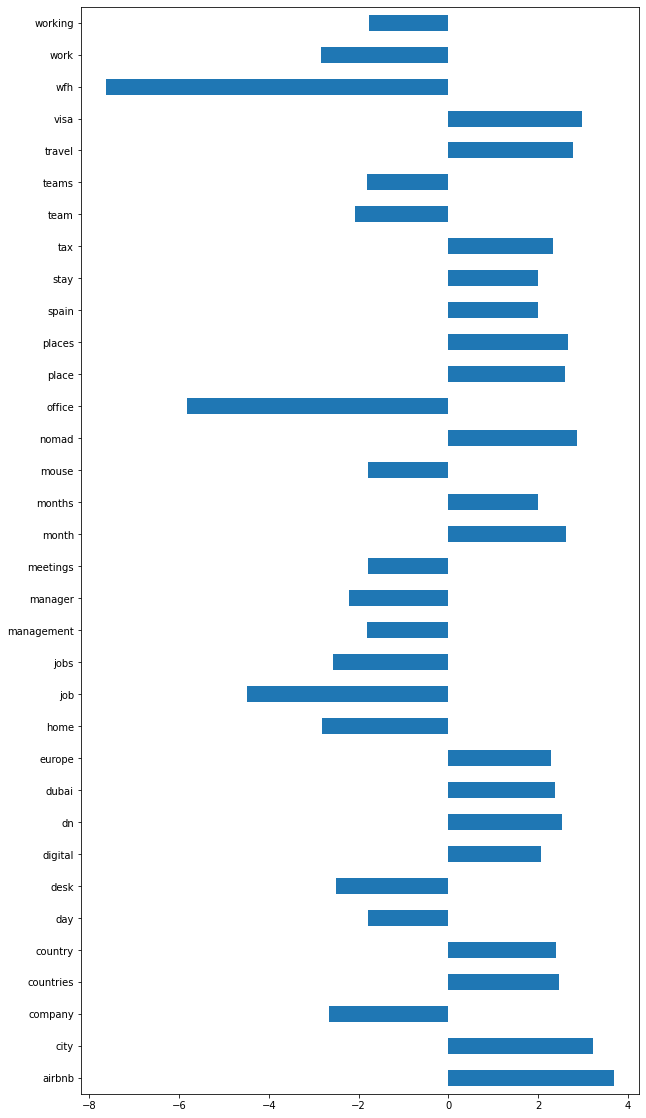

In [25]:
featurenamestDN = vectorizer.get_feature_names()
featstDN = pd.DataFrame(Log.coef_, columns=featurenamestDN)
featstDN
featstDN.loc[0,featstDN.iloc[0,:].abs() >1.75].plot(kind='barh', figsize=(10,20));

In [55]:
pipeLR.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('model', LogisticRegression())])

In [56]:
preds = pipeLR.predict(X_test)

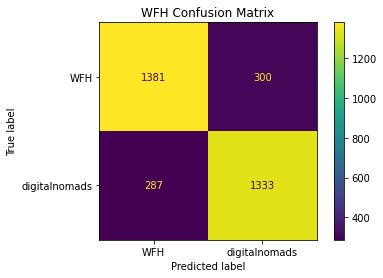

In [57]:
cm = confusion_matrix(y_test,Log.predict(X_test_counts))
labels = ['WFH', "digitalnomads"]
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.title('WFH Confusion Matrix');
plt.savefig('SubredditslogregCM.png');

In [58]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         WFH       0.80      0.85      0.82      1681
digitalnomad       0.83      0.77      0.80      1620

    accuracy                           0.81      3301
   macro avg       0.81      0.81      0.81      3301
weighted avg       0.81      0.81      0.81      3301

[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=None; total time=   0.8s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=english; total time=   0.8s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=None; total time=   0.7s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=None; total time=   0.8s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=english; total time=   0.8s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=None; total time=   1.9s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__sto

[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=None; total time=   0.7s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=None; total time=   0.9s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=3, vect__stop_words=english; total time=   0.7s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=None; total time=   0.8s
[CV] END model__C=0.1, model__penalty=l1, vect__min_df=4, vect__stop_words=english; total time=   0.8s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=None; total time=   1.8s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=3, vect__stop_words=None; total time=   1.7s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=4, vect__stop_words=None; total time=   1.7s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=4, vect__stop_words=english; total time=   1.2s
[CV] END model__C=0.1, model__penalty=l2, vect__min_df=4, vect__stop_words=english; total t

    It shows here that digitalnomads and WFH is predicited the same amount.

# Creating Wordcloud For Both Subreddit's

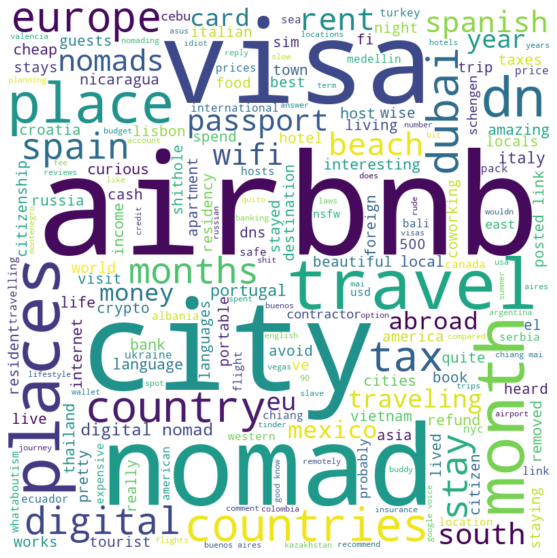

In [26]:
wordclouddf = featstDN.T
wordclouddf = wordclouddf[wordclouddf[0] >= 0][0].map(lambda x:  x**2)
wordclouddict = wordclouddf.to_dict()
wordclouddict['digitalnomads'] = 0

wordcloud = WordCloud(width=800, height=800,background_color='white').generate_from_frequencies(wordclouddict)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

    If we observe the word clouds , we can see that the wordclouds from r/digitalnomads follow a pattern that we would be able to distinguish which one is more adventureous with the work from home lifesyle while the other is more serious of working from their literal home. The word correlation airbnb, visa, city, and nomad being the most prominent for example.

## Conclusion and Future Work
    Using Natural Language Processing methods,I was able to analyze both subreddit's r/WFH and r/digitalnomads 
    to train a Natural Language Processing model to identify what subreddit a test string is more likely to 
    oringate from  (subreddit group). With further effort,I could observe more specific subreddits or users and 
    look at sentiment analysis and add a view of how individual users change over time their subreddit
    digital fingerprint.
    
    A good next step could be to use PRAW to gather posts from more groups such as  r/WFH, r/workfromhome, and 
    r/digitalnomands and analyze the intensity of the interaction connections between these three subreddits and 
    visualize the promising interconnections as the connections extend to outer groups.
